In [1]:
!ln -s ../hlm ./

ln: failed to create symbolic link './hlm': File exists


In [ ]:
#seaborn is required for the traceplots
import pysal as ps
import hlm
from hlm.verify import Delta_members
from hlm.plotting.traces import plot_trace
import numpy as np
import seaborn as sns
sns.set_palette('Set1', desat=.8)
import matplotlib.pyplot as plt
import multiprocessing as mp
%matplotlib inline

df = ps.pdio.read_files(ps.examples.get_path('south.shp'))
df = df[df.STATE_NAME != 'District of Columbia']
X = df[['GI89', 'BLK90', 'HR90']].values
N = X.shape[0]
Z = df.groupby('STATE_NAME')['FH90'].mean()
Z = Z.values.reshape(-1,1)
J = Z.shape[0]

Y = df.DNL90.values.reshape(-1,1)
W2 = ps.queen_from_shapefile(ps.examples.get_path('us48.shp'), 
                             idVariable='STATE_NAME')
W2 = ps.w_subset(W2, ids=df.STATE_NAME.unique().tolist())
W1 = ps.queen_from_shapefile(ps.examples.get_path('south.shp'),
                             idVariable='FIPS')
W1 = ps.w_subset(W1, ids=df.FIPS.tolist())

W1.transform = 'r'
W2.transform = 'r'
membership = df.STATE_NAME.apply(lambda x: W2.id_order.index(x)).values
Delta, membership = Delta_members(None, membership, W1.n, W2.n)

In [2]:
WZ = ps.lag_spatial(W2, Z)
ZDurbin = np.hstack((Z, WZ))

In [3]:
a = hlm.upper.SE(Y,X,M=W2, Z=ZDurbin, membership=membership, n_samples=0, 
                  tuning=1000)

In [4]:
a.sample(1000,n_jobs=2)

In [17]:
a.sample(5000, n_jobs=2)

/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


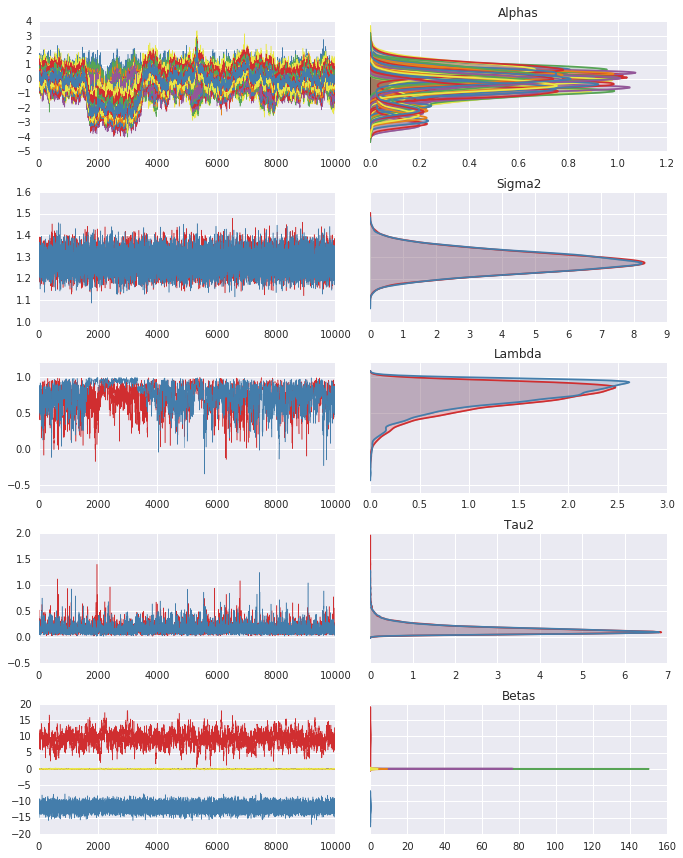

In [18]:
a.trace.plot()
plt.tight_layout()
plt.show()

In [7]:
b = hlm.both.Generic(Y,X,W=W1, M=W2, Z=ZDurbin, membership=membership,
                     n_samples=0, tuning=1000)

In [8]:
b.sample(10, n_jobs=2)

In [9]:
b.sample(10)

In [7]:
c = hlm.both.MVCM(Y,X,Z=ZDurbin, membership=membership, n_samples=0)

In [8]:
c.sample(100, n_jobs=2)

/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(<matplotlib.figure.Figure at 0x7f4f9e86f588>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f9e884320>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x7f4f9e8be198>]], dtype=object))

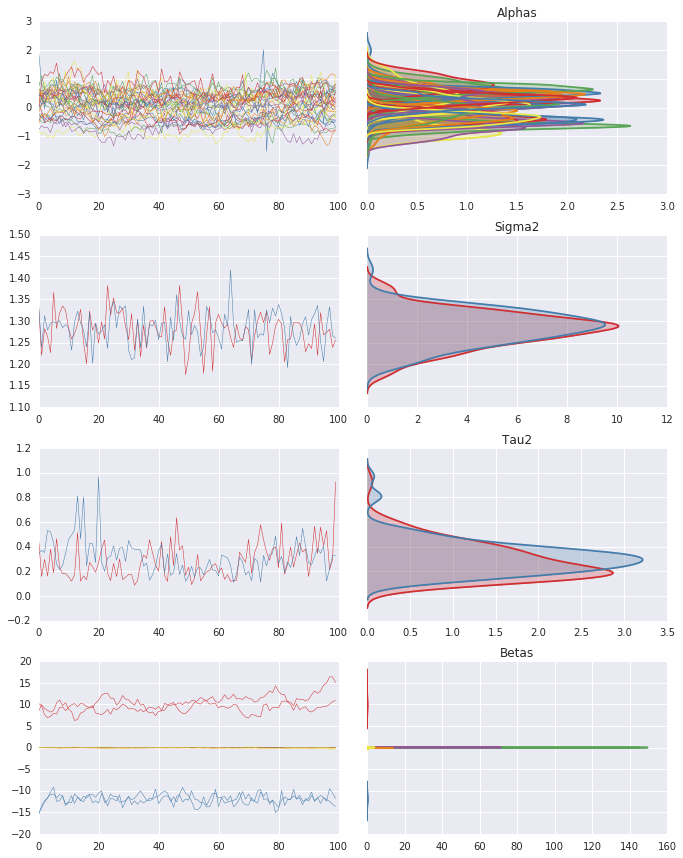

In [9]:
c.trace.plot()

In [10]:
c.sample(100, n_jobs=2)

/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(<matplotlib.figure.Figure at 0x7f4f9eaa2a20>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fa135efd0>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x7f4f9cf32780>]], dtype=object))

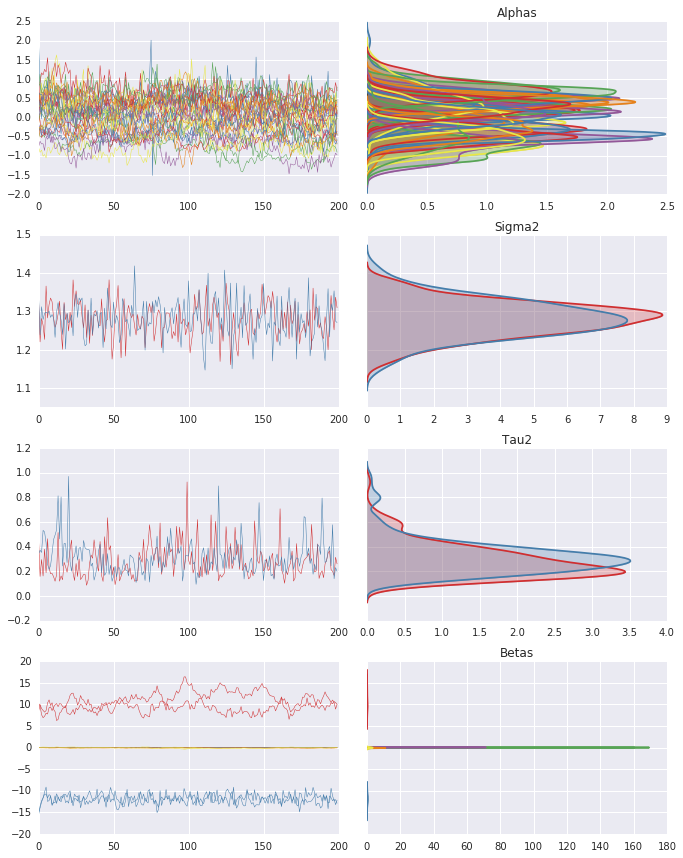

In [11]:
c.trace.plot()